In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
src = '../2019_G2F_Shared/'
dst = '../model/field_data/'

data_file = 'merged_data.csv'

data = pd.read_csv(src + data_file)
#data = pd.read_csv('../field_data/merged_data.csv')
print(data.shape)
for i,c in enumerate(data.columns):
    print(i,'\t',c)

(368, 220)
0 	 plot
1 	 New_Source
2 	 New_Pedigree
3 	 Old_Pedigree
4 	 Old_Source
5 	 Shared
6 	 New_Family
7 	 Tester
8 	 Pass
9 	 Range
10 	 Group.1
11 	 Rep
12 	 Date.Time
13 	 Harvest.Sequence
14 	 X
15 	 Stand.Count
16 	 GreenSnap
17 	 Root Lodging
18 	 Stalk Lodging
19 	 canopy_cover
20 	 Weight
21 	 Moisture
22 	 Test.Weight
23 	 yield_originaal_moisture
24 	 yield_dry
25 	 yield_standard
26 	 yield_standard_bu
27 	 yield_dry_gm
28 	 dry_matter/plant(kg)
29 	 Ear_Leaf_Length (cm)
30 	 Ear_Leaf_Width (cm)
31 	 Ear_Leaf_Area (cm^2)
32 	 Ear_Height (cm)
33 	 Plant_Height (cm)
34 	 Ear_Leaf_N
35 	 Total_Leaf_N
36 	 AnthesisGDD
37 	 SilkingGDD
38 	 TLA (m2)
39 	 epd
40 	 ear_leaf_weight (g)
41 	 LAI
42 	 BLUE_2019702dronemean
43 	 BLUE_STD_2019702dronemean
44 	 GREEN_2019702dronemean
45 	 GREEN_STD_2019702dronemean
46 	 NDVI_2019702dronemean
47 	 NDVI_STD_2019702dronemean
48 	 NIR_2019702dronemean
49 	 NIR_STD_2019702dronemean
50 	 RED_2019702dronemean
51 	 RED_STD_2019702dronemean

In [3]:
pcorr = data.iloc[:,19:].corr(method='pearson')
pcorr

,canopy_cover,Weight,Moisture,Test.Weight,yield_originaal_moisture,yield_dry,yield_standard,yield_standard_bu,yield_dry_gm,dry_matter/plant(kg),...,Stem.Angle_L2,A1_L2,N1_L2,A2_L2,N2_L2,a_L2,b_L2,c_L2,d_L2,model_leaf_length_L2
canopy_cover,1.000000,0.414782,0.029320,-0.086161,0.414782,0.421843,0.421843,0.415222,0.421843,-0.182845,...,0.054126,-0.015386,0.026227,0.062696,0.036528,0.130444,0.180357,-0.006778,-0.020636,0.121914
Weight,0.414782,1.000000,0.151360,-0.141721,1.000000,0.992655,0.992655,0.985747,0.992655,0.569922,...,-0.104689,0.048855,0.007301,0.042297,0.054092,0.035502,0.017263,0.207669,0.121527,0.194952
Moisture,0.029320,0.151360,1.000000,-0.261202,0.151360,0.038517,0.038517,0.111759,0.038517,-0.073181,...,0.005644,0.157589,-0.134478,-0.082195,0.015840,-0.188861,-0.169051,0.059062,-0.016200,-0.035132
Test.Weight,-0.086161,-0.141721,-0.261202,1.000000,-0.141721,-0.109274,-0.109274,-0.274143,-0.109274,-0.111165,...,0.038350,-0.103579,0.059264,0.038000,-0.032486,0.076124,0.121206,-0.088037,-0.058896,0.020646
yield_originaal_moisture,0.414782,1.000000,0.151360,-0.141721,1.000000,0.992655,0.992655,0.985747,0.992655,0.569922,...,-0.104689,0.048855,0.007301,0.042297,0.054092,0.035502,0.017263,0.207669,0.121527,0.194952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a_L2,0.130444,0.035502,-0.188861,0.076124,0.035502,0.058256,0.058256,0.031689,0.058256,0.039499,...,0.316881,-0.444161,0.389459,0.071190,-0.131168,1.000000,0.651822,-0.121716,0.060653,0.289354
b_L2,0.180357,0.017263,-0.169051,0.121206,0.017263,0.038205,0.038205,0.005717,0.038205,0.001245,...,0.325427,-0.273498,0.198237,0.446563,0.175147,0.651822,1.000000,-0.184263,-0.016461,0.489477
c_L2,-0.006778,0.207669,0.059062,-0.088037,0.207669,0.203304,0.203304,0.210624,0.203304,0.241992,...,-0.485779,0.379130,-0.205499,0.005641,0.180535,-0.121716,-0.184263,1.000000,0.762509,0.474770
d_L2,-0.020636,0.121527,-0.016200,-0.058896,0.121527,0.126371,0.126371,0.129483,0.126371,0.171895,...,-0.313112,0.169182,-0.118128,0.169197,0.391445,0.060653,-0.016461,0.762509,1.000000,0.103322


In [4]:
scorr = data.iloc[:,19:].corr(method='spearman')
scorr

,canopy_cover,Weight,Moisture,Test.Weight,yield_originaal_moisture,yield_dry,yield_standard,yield_standard_bu,yield_dry_gm,dry_matter/plant(kg),...,Stem.Angle_L2,A1_L2,N1_L2,A2_L2,N2_L2,a_L2,b_L2,c_L2,d_L2,model_leaf_length_L2
canopy_cover,1.000000,0.330251,0.015230,-0.003358,0.330251,0.336366,0.336366,0.324201,0.336366,0.025760,...,0.044907,-0.086045,0.043994,0.156005,0.045471,0.176139,0.236664,-0.001022,-0.021814,0.176886
Weight,0.330251,1.000000,0.146985,-0.181027,1.000000,0.991790,0.991790,0.989930,0.991790,0.762242,...,-0.101808,0.021132,0.023972,0.043394,0.056249,0.040943,0.008063,0.215053,0.117030,0.233225
Moisture,0.015230,0.146985,1.000000,-0.546024,0.146985,0.040535,0.040535,0.118899,0.040535,0.077079,...,-0.005562,0.183633,-0.134975,-0.096444,-0.033944,-0.181117,-0.203923,0.058209,-0.030159,-0.022413
Test.Weight,-0.003358,-0.181027,-0.546024,1.000000,-0.181027,-0.121414,-0.121414,-0.264183,-0.121414,-0.103325,...,0.007796,-0.170765,0.132225,0.068859,0.012404,0.152330,0.192958,-0.089580,-0.031574,0.055348
yield_originaal_moisture,0.330251,1.000000,0.146985,-0.181027,1.000000,0.991790,0.991790,0.989930,0.991790,0.762242,...,-0.101808,0.021132,0.023972,0.043394,0.056249,0.040943,0.008063,0.215053,0.117030,0.233225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a_L2,0.176139,0.040943,-0.181117,0.152330,0.040943,0.066824,0.066824,0.034412,0.066824,0.027490,...,0.272720,-0.509852,0.427321,0.028030,-0.039463,1.000000,0.654276,-0.120407,0.051586,0.331954
b_L2,0.236664,0.008063,-0.203923,0.192958,0.008063,0.032346,0.032346,-0.001311,0.032346,-0.002932,...,0.302476,-0.302363,0.203917,0.515952,0.218889,0.654276,1.000000,-0.171606,-0.001871,0.466996
c_L2,-0.001022,0.215053,0.058209,-0.089580,0.215053,0.205832,0.205832,0.212950,0.205832,0.255692,...,-0.466469,0.359166,-0.198920,0.089335,0.238351,-0.120407,-0.171606,1.000000,0.749350,0.437649
d_L2,-0.021814,0.117030,-0.030159,-0.031574,0.117030,0.120402,0.120402,0.121264,0.120402,0.161612,...,-0.292142,0.202047,-0.084254,0.293514,0.434540,0.051586,-0.001871,0.749350,1.000000,0.082357


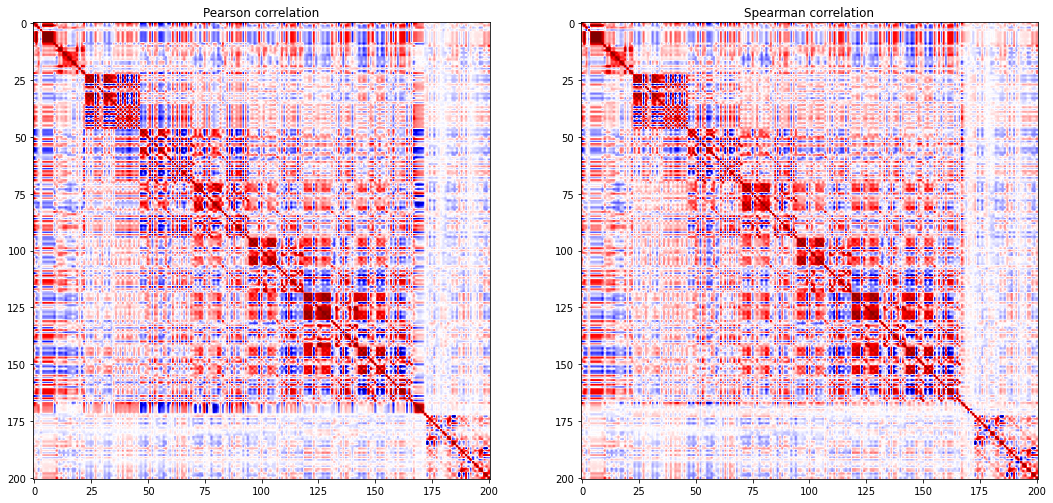

In [5]:
cmap = 'seismic'
vmax,vmin = 1,-1

fig, ax = plt.subplots(1,2,figsize=(18,9))

i = 0
ax[i].imshow(np.array(pcorr), cmap=cmap, vmax=vmax, vmin=vmin)
ax[i].set_title('Pearson correlation')

i = 1
ax[i].imshow(np.array(scorr), cmap=cmap, vmax=vmax, vmin=vmin)
ax[i].set_title('Spearman correlation');

In [6]:
for i,c in enumerate(scorr.columns):
    print(i, '\t', c)

0 	 canopy_cover
1 	 Weight
2 	 Moisture
3 	 Test.Weight
4 	 yield_originaal_moisture
5 	 yield_dry
6 	 yield_standard
7 	 yield_standard_bu
8 	 yield_dry_gm
9 	 dry_matter/plant(kg)
10 	 Ear_Leaf_Length (cm)
11 	 Ear_Leaf_Width (cm)
12 	 Ear_Leaf_Area (cm^2)
13 	 Ear_Height (cm)
14 	 Plant_Height (cm)
15 	 Ear_Leaf_N
16 	 Total_Leaf_N
17 	 AnthesisGDD
18 	 SilkingGDD
19 	 TLA (m2)
20 	 epd
21 	 ear_leaf_weight (g)
22 	 LAI
23 	 BLUE_2019702dronemean
24 	 BLUE_STD_2019702dronemean
25 	 GREEN_2019702dronemean
26 	 GREEN_STD_2019702dronemean
27 	 NDVI_2019702dronemean
28 	 NDVI_STD_2019702dronemean
29 	 NIR_2019702dronemean
30 	 NIR_STD_2019702dronemean
31 	 RED_2019702dronemean
32 	 RED_STD_2019702dronemean
33 	 RED_EDGE_2019702dronemean
34 	 RED_EDGE_STD_2019702dronemean
35 	 BGI_72_mean_2019702dronemean
36 	 BGI_72_STD_2019702dronemean
37 	 EVI_72_mean_2019702dronemean
38 	 EVI_72_STD_2019702dronemean
39 	 GNDVI_72_mean_2019702dronemean
40 	 GNDVI_72_STD_2019702dronemean
41 	 Ratio_72

In [12]:
#ss = list(range(23)) + list(range(167, len(scorr)))

ss = [0] + list(range(10, 23)) + list(range(167, 178)) + list(range(187, 192))

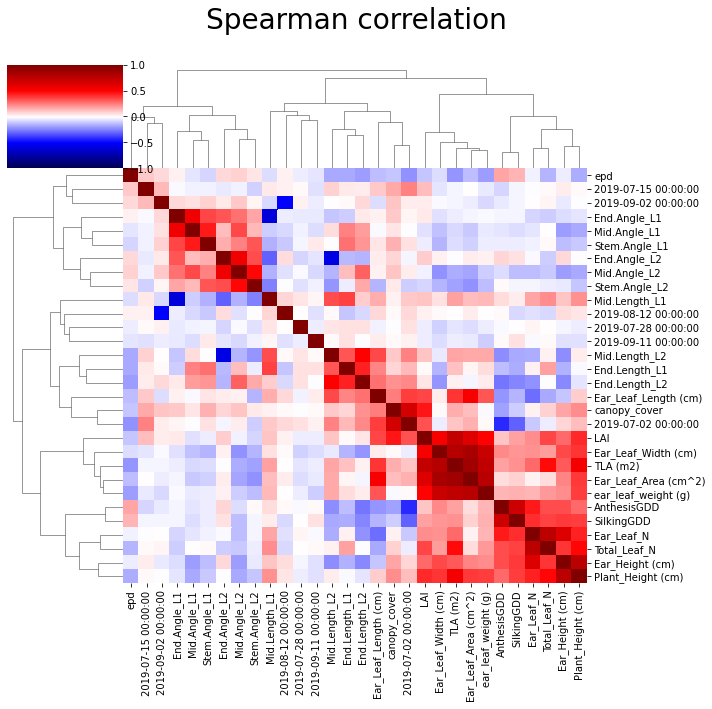

In [13]:
sns.clustermap(scorr.iloc[ss, ss], method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Spearman correlation', fontsize=28);

#filename = dst + 'spearman_correlation_sub.jpg'
#plt.savefig(filename, dpi=130, format='jpg', pil_kwargs={'optimize':True}, bbox_inches='tight')

Text(0.5, 0.98, 'Pearson correlation')

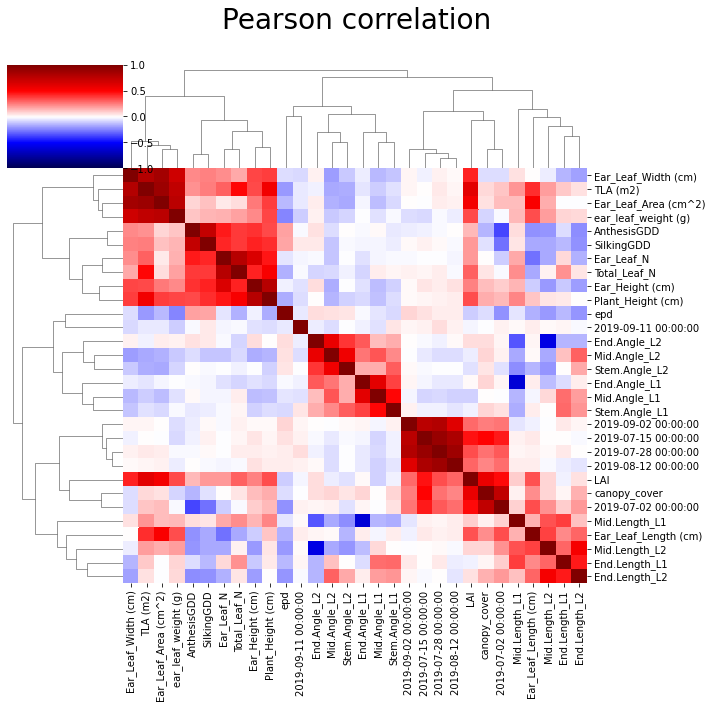

In [14]:
sns.clustermap(pcorr.iloc[ss,ss], method='complete', vmax=vmax, vmin=vmin, cmap=cmap);
plt.subplots_adjust(top=0.9)
plt.suptitle('Pearson correlation', fontsize=28);

# Sklearn

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
cols = list(data.columns.values)
for i in range(len(cols)):
    print(i, '\t', cols[i])

0 	 plot
1 	 New_Source
2 	 New_Pedigree
3 	 Old_Pedigree
4 	 Old_Source
5 	 Shared
6 	 New_Family
7 	 Tester
8 	 Pass
9 	 Range
10 	 Group.1
11 	 Rep
12 	 Date.Time
13 	 Harvest.Sequence
14 	 X
15 	 Stand.Count
16 	 GreenSnap
17 	 Root Lodging
18 	 Stalk Lodging
19 	 canopy_cover
20 	 Weight
21 	 Moisture
22 	 Test.Weight
23 	 yield_originaal_moisture
24 	 yield_dry
25 	 yield_standard
26 	 yield_standard_bu
27 	 yield_dry_gm
28 	 dry_matter/plant(kg)
29 	 Ear_Leaf_Length (cm)
30 	 Ear_Leaf_Width (cm)
31 	 Ear_Leaf_Area (cm^2)
32 	 Ear_Height (cm)
33 	 Plant_Height (cm)
34 	 Ear_Leaf_N
35 	 Total_Leaf_N
36 	 AnthesisGDD
37 	 SilkingGDD
38 	 TLA (m2)
39 	 epd
40 	 ear_leaf_weight (g)
41 	 LAI
42 	 BLUE_2019702dronemean
43 	 BLUE_STD_2019702dronemean
44 	 GREEN_2019702dronemean
45 	 GREEN_STD_2019702dronemean
46 	 NDVI_2019702dronemean
47 	 NDVI_STD_2019702dronemean
48 	 NIR_2019702dronemean
49 	 NIR_STD_2019702dronemean
50 	 RED_2019702dronemean
51 	 RED_STD_2019702dronemean
52 	 RED_E

In [46]:
cols = list(data.columns.values)
colss = cols[15:17] + cols[29:42]
#colss += cols[192:197] + cols[206:211] 
#colss += cols[197:206] + cols[211:] 
colss += cols[42:66]

pheno = data.loc[:, colss].copy()
pheno_scaled = StandardScaler().fit_transform(pheno)
print(pheno.shape)

(368, 39)


In [6]:
#y = data['canopy_cover'].values
y = data['2019-07-02 00:00:00'].values

y_scaled = (y - y.mean())/y.std()

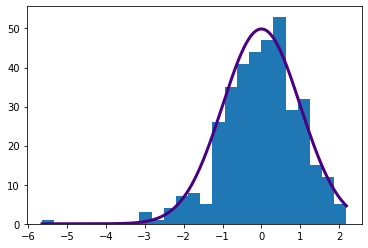

In [7]:
gauss = stats.norm(0,1)
foo = np.linspace(y_scaled.min(),y_scaled.max(),1024)

plt.hist(y_scaled, 25);
plt.plot(foo,125*gauss.pdf(foo), c='indigo', label='N(0,1)', lw=3);

In [155]:
X_train, X_test, y_train, y_test = train_test_split(pheno_scaled,
                                                    y_scaled,
                                                    test_size=0.5)

In [156]:
#svr_params = {'C':10, 'kernel':'rbf', 'gamma':0.01, 'epsilon':.01}
svr_params = {'kernel':'poly', 'C':100, 'gamma':0.001, 'degree':3, 'epsilon':0.01, 'coef0':1}
svr = SVR(**svr_params).fit(X_train, y_train)
print('R^2 score:', svr.score(X_test, y_test))
print('X.shape:', X_train.shape)
print('Support vectors:', svr.n_support_[0])

R^2 score: 0.48408909947801515
X.shape: (184, 25)
Support vectors: 181


In [157]:
nusvr_params = {'C':10, 'kernel':'rbf', 'gamma':0.01, 'nu':.05}
#svr_params = {'kernel':'poly', 'C':100, 'gamma':0.001, 'degree':4, 'epsilon':0.01, 'coef0':1}
svr = NuSVR(**nusvr_params).fit(X_train, y_train)
print('R^2 score:', svr.score(X_test, y_test))
print('X.shape:', X_train.shape)
print('Support vectors:', svr.n_support_[0])

R^2 score: 0.443189509235132
X.shape: (184, 25)
Support vectors: 38


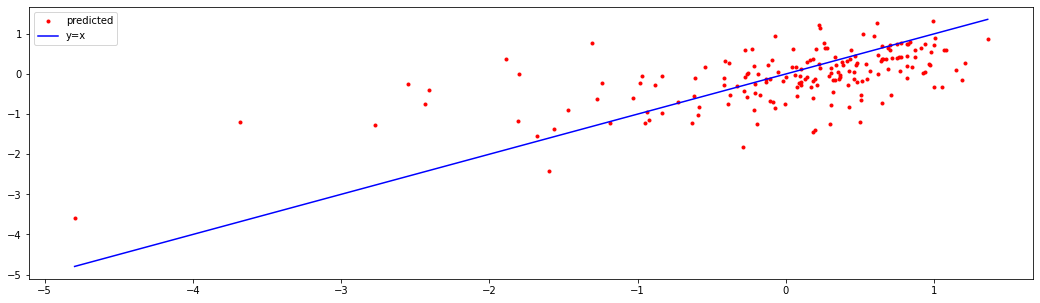

In [119]:
ypred = svr.predict(X_test)

xaxis = np.linspace(np.min(y_test), np.max(y_test), 10)
plt.figure(figsize=(18,5))
plt.plot(y_test, ypred,'.r', label='predicted')
#plt.plot(ypred, '.b', label='predicted');
plt.plot(xaxis, xaxis, 'b', label='y=x')
plt.legend();

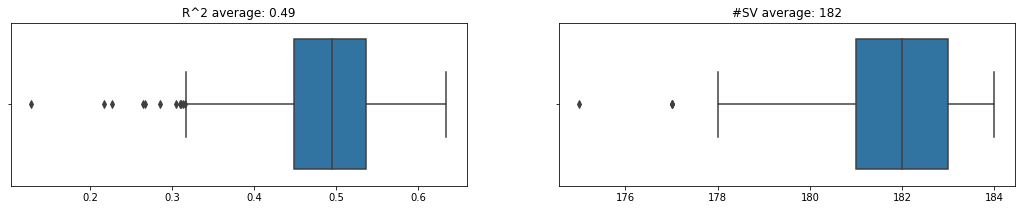

In [25]:
svr_params = {'kernel':'poly', 'C':100, 'gamma':0.001, 'degree':3, 'epsilon':0.01, 'coef0':1}

N = 1000
score = np.zeros(N)
supvecs = np.zeros(N)

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(pheno_scaled, y_scaled, test_size=0.5)
    svr = SVR(**svr_params).fit(X_train, y_train)
    score[i] = svr.score(X_test, y_test)
    supvecs[i] = svr.n_support_[0]

fig, ax = plt.subplots(1,2,figsize=(18,3))

sns.boxplot(x=score, ax=ax[0]);
ax[0].set_title('R^2 average: {:.2f}'.format(np.mean(score)))
sns.boxplot(x=supvecs, ax=ax[1]);
ax[1].set_title('#SV average: {:.0f}'.format(np.round(np.mean(supvecs))));

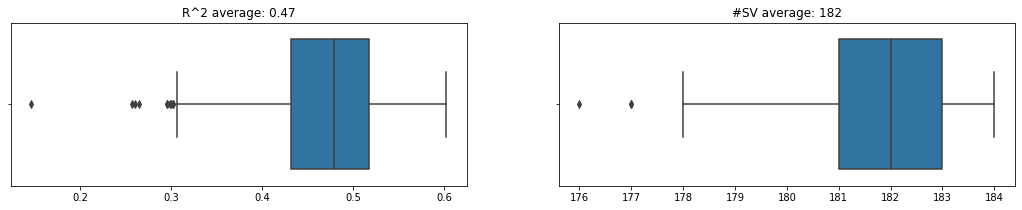

In [9]:
svr_params = {'C':10, 'kernel':'rbf', 'gamma':0.01, 'epsilon':.01}

N = 1000
score = np.zeros(N)
supvecs = np.zeros(N)

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(pheno_scaled, y_scaled, test_size=0.5)
    svr = SVR(**svr_params).fit(X_train, y_train)
    score[i] = svr.score(X_test, y_test)
    supvecs[i] = svr.n_support_[0]

fig, ax = plt.subplots(1,2,figsize=(18,3))

sns.boxplot(x=score, ax=ax[0]);
ax[0].set_title('R^2 average: {:.2f}'.format(np.mean(score)))
sns.boxplot(x=supvecs, ax=ax[1]);
ax[1].set_title('#SV average: {:.0f}'.format(np.round(np.mean(supvecs))));

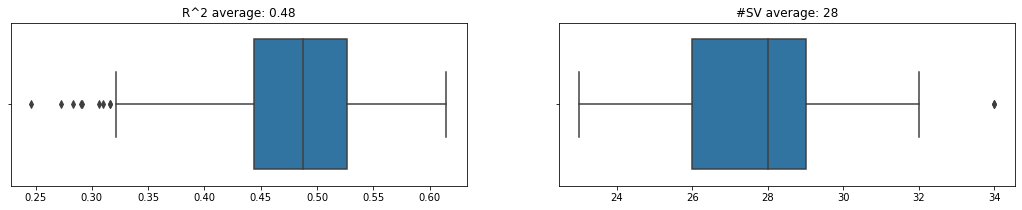

In [10]:
nusvr_params = {'kernel':'poly', 'C':100, 'gamma':0.001, 'degree':3, 'nu':0.1, 'coef0':1}

N = 1000
score = np.zeros(N)
supvecs = np.zeros(N)

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(pheno_scaled, y_scaled, test_size=0.5)
    svr = NuSVR(**nusvr_params).fit(X_train, y_train)
    score[i] = svr.score(X_test, y_test)
    supvecs[i] = svr.n_support_[0]

fig, ax = plt.subplots(1,2,figsize=(18,3))

sns.boxplot(x=score, ax=ax[0]);
ax[0].set_title('R^2 average: {:.2f}'.format(np.mean(score)))
sns.boxplot(x=supvecs, ax=ax[1]);
ax[1].set_title('#SV average: {:.0f}'.format(np.round(np.mean(supvecs))));

In [11]:
nusvr_params = {'kernel':'poly', 'C':1, 'gamma':0.01, 'degree':3, 'nu':0.1, 'coef0':1}
svr = NuSVR(**nusvr_params).fit(pheno_scaled, y_scaled)
print(svr.score(X_test, y_test))
print(svr.n_support_[0])
print(np.around(svr.n_support_[0]/pheno_scaled.shape[0]*100, 2), '%')

0.5241279454777981
44
11.96 %


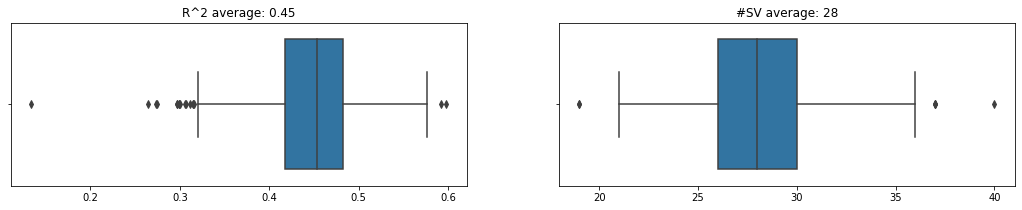

In [12]:
nusvr_params = {'C':10, 'kernel':'rbf', 'gamma':0.02, 'nu':.05}

N = 1000
score = np.zeros(N)
supvecs = np.zeros(N)

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(pheno_scaled, y_scaled, test_size=0.5)
    svr = NuSVR(**nusvr_params).fit(X_train, y_train)
    score[i] = svr.score(X_test, y_test)
    supvecs[i] = svr.n_support_[0]

fig, ax = plt.subplots(1,2,figsize=(18,3))

sns.boxplot(x=score, ax=ax[0]);
ax[0].set_title('R^2 average: {:.2f}'.format(np.mean(score)))
sns.boxplot(x=supvecs, ax=ax[1]);
ax[1].set_title('#SV average: {:.0f}'.format(np.round(np.mean(supvecs))));

In [13]:
nusvr_params = {'C':10, 'kernel':'rbf', 'gamma':0.02, 'nu':.05}

svr = NuSVR(**nusvr_params).fit(pheno_scaled, y_scaled)
print(svr.score(X_test, y_test))
print(svr.n_support_[0])
print(np.around(svr.n_support_[0]/pheno_scaled.shape[0]*100, 2), '%')

0.5999764184602289
42
11.41 %


# Ridge Regression

In [26]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [49]:
clf = RidgeCV(np.linspace(0.01,1,50)).fit(pheno_scaled, y_scaled)
print('Score: ',clf.score(pheno_scaled, y_scaled))
print('alpha:', clf.alpha_)
coefsf = clf.coef_

Score:  0.8122734097262747
alpha: 0.1716326530612245


In [50]:
argsort = np.argsort(np.abs(coefsf))[::-1]
vals = np.array(colss)[argsort]
coef = coefsf/np.sum(np.abs(coefsf))

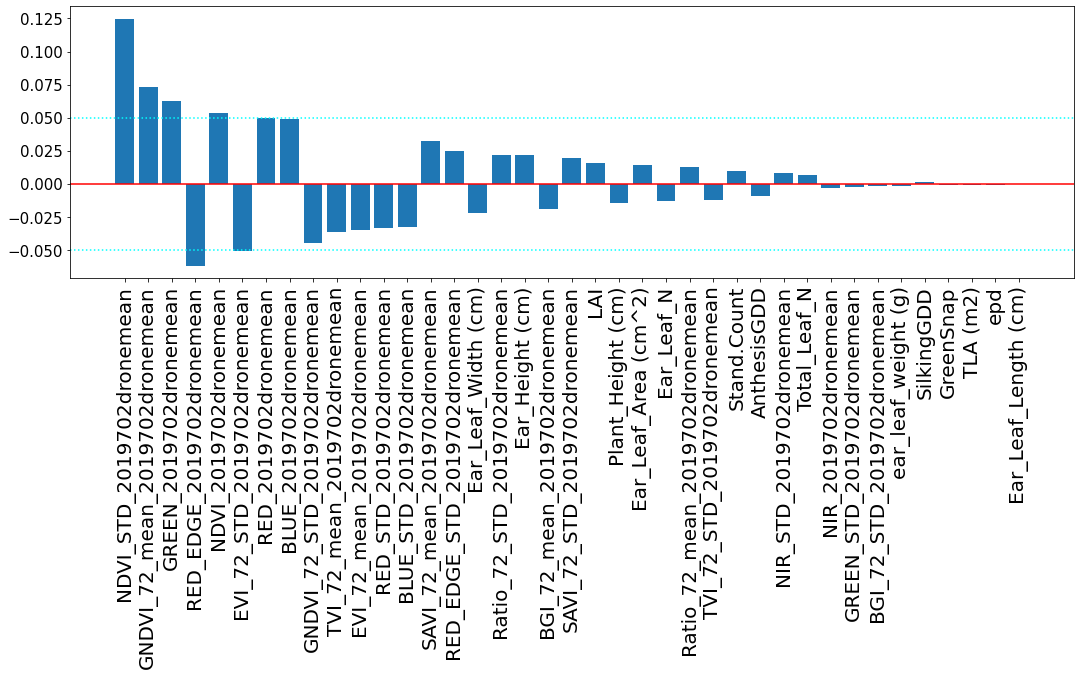

In [51]:
plt.figure(figsize=(18,5))
plt.bar(range(len(vals)), coef[argsort])
plt.axhline(0, c='red')
plt.axhline(0.05, c='cyan', ls=':')
plt.axhline(-0.05, c='cyan', ls=':')
plt.xticks(range(len(vals)), vals, rotation='vertical', fontsize=20);
plt.tick_params('y', labelsize=15);

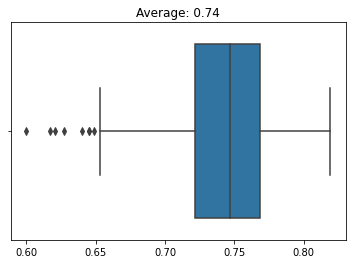

In [52]:
ridge_params = {'alpha':clf.alpha_, 'fit_intercept':False}

N = 1000
score = np.zeros(N)
coefs = np.zeros((N, len(colss)))

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(pheno_scaled, y_scaled, test_size=0.5)
    clff = Ridge(**ridge_params).fit(X_train, y_train)
    score[i] = clff.score(X_test, y_test)
    coefs[i,:] = clff.coef_
    
ax = sns.boxplot(x=score)
ax.set_title('Average: {:.2f}'.format(np.mean(score)));

In [53]:
clf = LassoCV(alphas=np.linspace(0.01,1,50)).fit(pheno_scaled, y_scaled)
print('Score: ',clf.score(pheno_scaled, y_scaled))
print('alpha:', clf.alpha_)
coefsf = clf.coef_

Score:  0.7705293284912696
alpha: 0.01


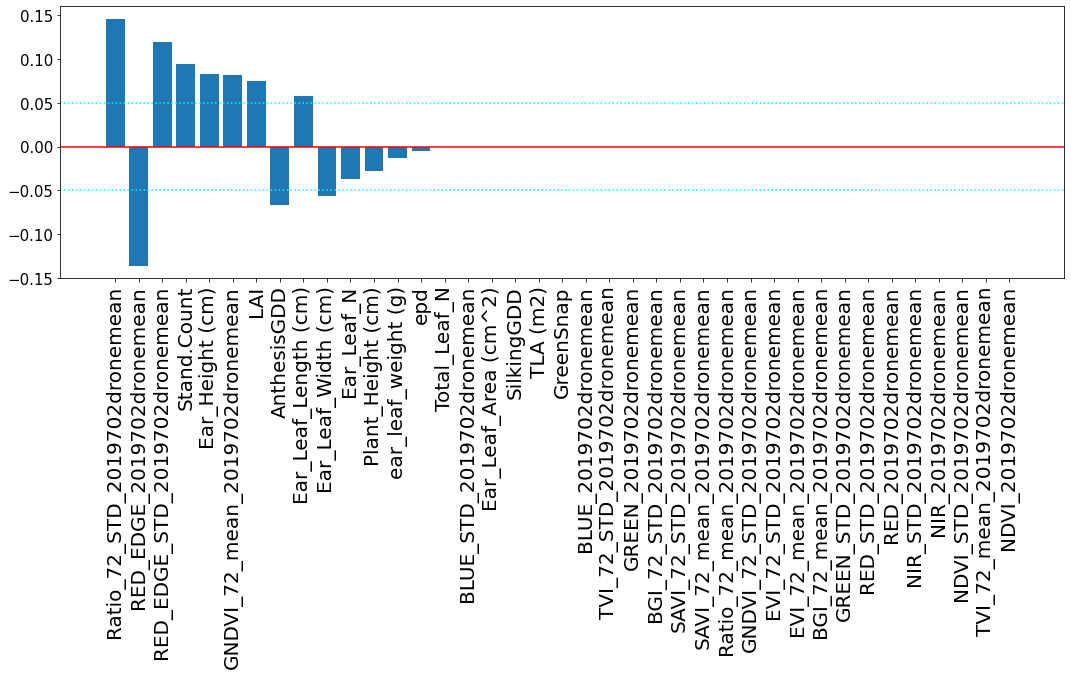

In [54]:
argsort = np.argsort(np.abs(coefsf))[::-1]
vals = np.array(colss)[argsort]
coef = coefsf/np.sum(np.abs(coefsf))

plt.figure(figsize=(18,5))
plt.bar(range(len(vals)), coef[argsort])
plt.axhline(0, c='red')
plt.axhline(0.05, c='cyan', ls=':')
plt.axhline(-0.05, c='cyan', ls=':')
plt.xticks(range(len(vals)), vals, rotation='vertical', fontsize=20);
plt.tick_params('y', labelsize=15);

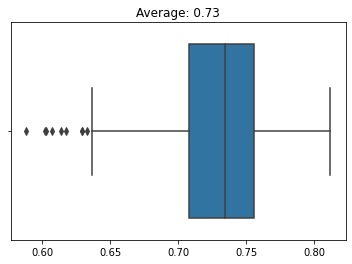

In [55]:
ridge_params = {'alpha':clf.alpha_, 'fit_intercept':False}

N = 1000
score = np.zeros(N)
coefs = np.zeros((N, len(colss)))

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(pheno_scaled, y_scaled, test_size=0.5)
    clff = Lasso(**ridge_params).fit(X_train, y_train)
    score[i] = clff.score(X_test, y_test)
    coefs[i,:] = clff.coef_
    
ax = sns.boxplot(x=score)
ax.set_title('Average: {:.2f}'.format(np.mean(score)));

# PCA

In [199]:
y_var = (y - y.min())/(y.max() - y.min())

In [200]:
from sklearn.decomposition import PCA, KernelPCA

In [201]:
pca = PCA(n_components=2)
pca.fit(pheno_scaled)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.32240997 0.17812487]
[43.57005728 32.38516963]


In [202]:
prcomp = pca.transform(pheno_scaled)

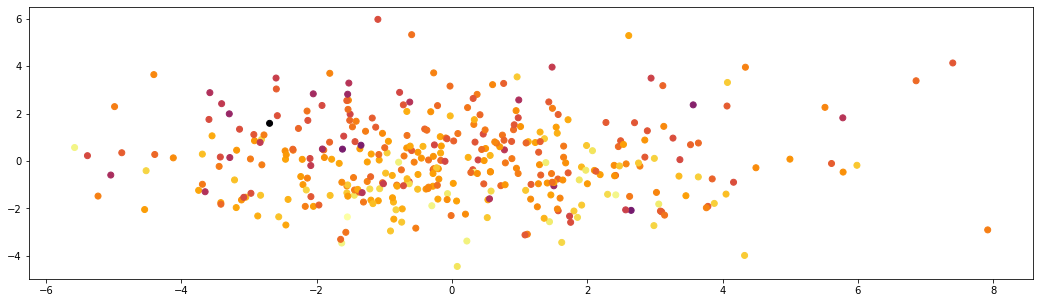

In [203]:
plt.figure(figsize=(18,5))

plt.scatter(prcomp[:,0], prcomp[:,1], c=y_var, cmap='inferno');

# KPCA

In [204]:
kpca = KernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=False, gamma=0.01)
X_kpca = kpca.fit_transform(pheno_scaled)

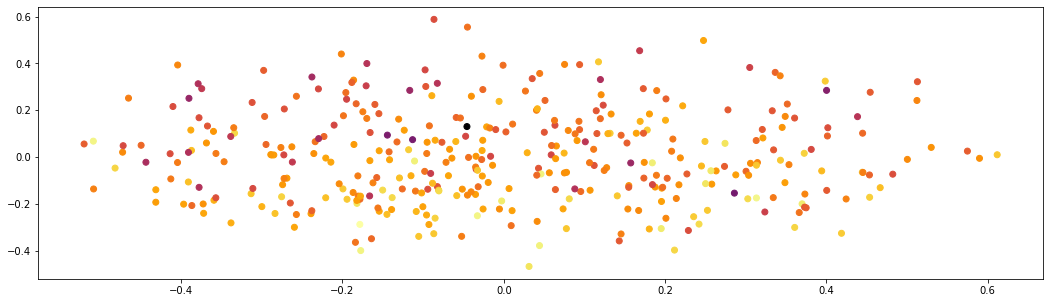

In [205]:
plt.figure(figsize=(18,5))

plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y_var, cmap='inferno');